In [69]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score

### 1. Dada la siguiente tabla de datos:

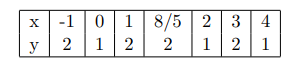

Utilizar “a mano” el metodo de k-medias para agrupar los datos en 2 clusters.

- (a) Comenzando con b1 = (1, 2) y b2 = (3, 2)
- (b) Comenzando con b1 = (0, 1) y b2 = (3, 2)

¿Se obtiene la misma clasificaci´on? ¿Alguna de las clasificaciones obtenidas le parece m´as
apropiada?

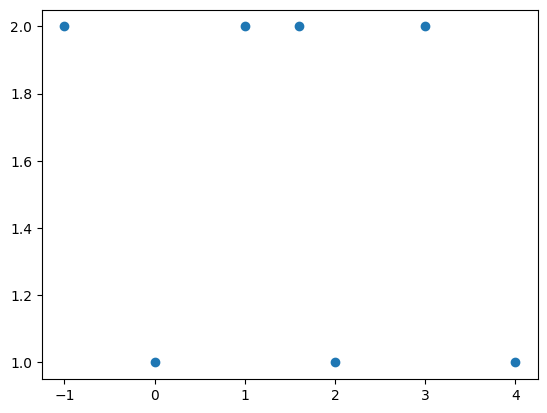

In [3]:
x = [-1,0,1,8/5,2,3,4]
y = [2,1,2,2,1,2,1]

plt.scatter(x,y)
plt.show()

Centroides finales para el caso (a):
[[0.4  1.75]
 [3.5  1.5 ]]
Etiquetas de clusters para el caso (a):
[0 0 0 0 1 1]


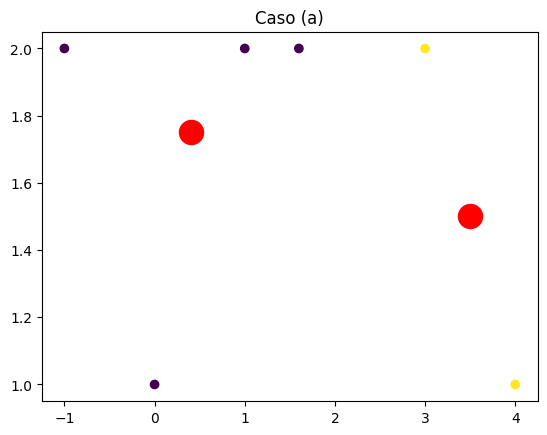

In [17]:
# Datos
data = np.array([[-1, 2], [0, 1], [1, 2], [8/5, 2], [3, 2], [4, 1]])

# Inicialización de centroides
centroids_a = np.array([[1, 2], [3, 2]])

def k_means(data, centroids, iterations=10):
    for _ in range(iterations):
        # Asignación de clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=0)
        
        # Recalcular centroides
        new_centroids = np.array([data[closest_centroids == k].mean(axis=0) for k in range(centroids.shape[0])])
        
        # Si los centroides no cambian, romper el bucle
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, closest_centroids

centroids_a_final, labels_a = k_means(data, centroids_a)

print("Centroides finales para el caso (a):")
print(centroids_a_final)
print("Etiquetas de clusters para el caso (a):")
print(labels_a)

# Visualización del resultado
plt.scatter(data[:, 0], data[:, 1], c=labels_a, cmap='viridis')
plt.scatter(centroids_a_final[:, 0], centroids_a_final[:, 1], s=300, c='red')
plt.title('Caso (a)')
plt.show()


Centroides finales para el caso (b):
[[0.         1.66666667]
 [2.86666667 1.66666667]]
Etiquetas de clusters para el caso (b):
[0 0 0 1 1 1]


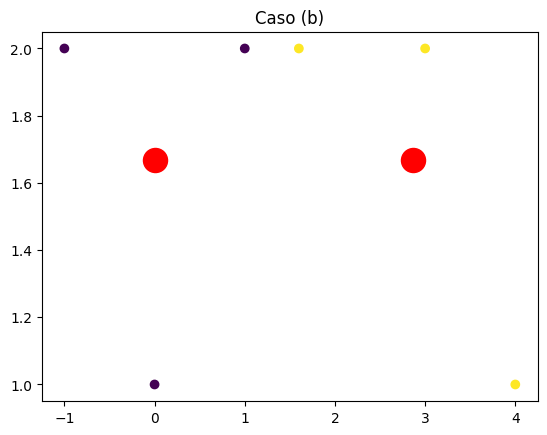

In [18]:
# Inicialización de centroides
centroids_b = np.array([[0, 1], [3, 2]])

centroids_b_final, labels_b = k_means(data, centroids_b)

print("Centroides finales para el caso (b):")
print(centroids_b_final)
print("Etiquetas de clusters para el caso (b):")
print(labels_b)

# Visualización del resultado
plt.scatter(data[:, 0], data[:, 1], c=labels_b, cmap='viridis')
plt.scatter(centroids_b_final[:, 0], centroids_b_final[:, 1], s=300, c='red')
plt.title('Caso (b)')
plt.show()


### 2. Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados
#### (a) Abra cada dataset en Python y genere un diagrama de dispersión (scatter plot) para cada uno

In [19]:
p7_data1 = pd.read_csv('../_src/Datasets/p7-data1.csv')
p7_data2 = pd.read_csv('../_src/Datasets/p7-data2.csv')

print(f"Columnas de p7_data1: {p7_data1.columns}")
print(f"Columnas de p7_data2: {p7_data2.columns}")

Columnas de p7_data1: Index(['x', 'y'], dtype='object')
Columnas de p7_data2: Index(['x', 'y'], dtype='object')


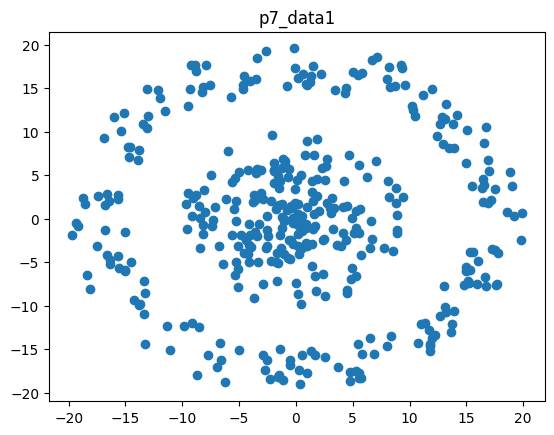

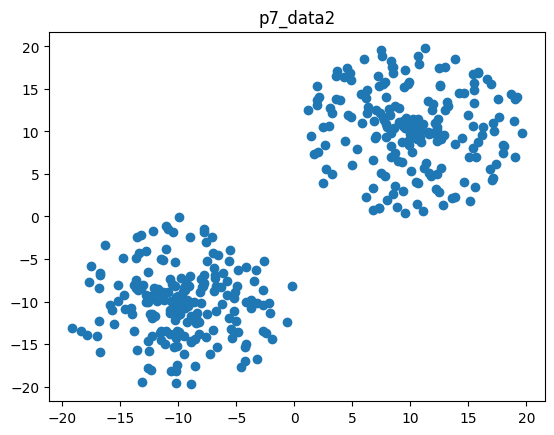

In [20]:
# Visualización de los datos
plt.scatter(p7_data1['x'], p7_data1['y'])
plt.title('p7_data1')
plt.show()

plt.scatter(p7_data2['x'], p7_data2['y'])
plt.title('p7_data2')
plt.show()

#### (b) Analizando los gr´aficos “a mano” considere cuantos clusters estan presentes

`RTA:` Tanto en data 1 como en data 2 hay 2 cluster 


#### (c) Pruebe ejecutar el comando `KMeans` con la cantidad de clusters que detecto. Analizar el comportamiento del procedimiento en cada caso

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


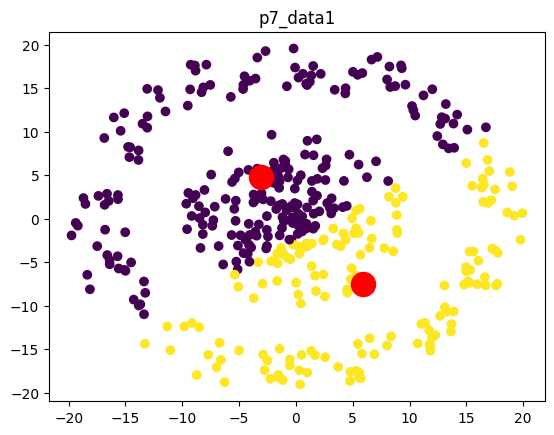

In [21]:
# Ejecutamos Kmeans en p7_data1 y p7_data2
kmeans = KMeans(n_clusters=2)
kmeans.fit(p7_data1)
labels_data1 = kmeans.labels_
centroids_data1 = kmeans.cluster_centers_

# Graficamos los resultados de p7_data1
plt.scatter(p7_data1['x'], p7_data1['y'], c=labels_data1, cmap='viridis')
plt.scatter(centroids_data1[:, 0], centroids_data1[:, 1], s=300, c='red')
plt.title('p7_data1')
plt.show()

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


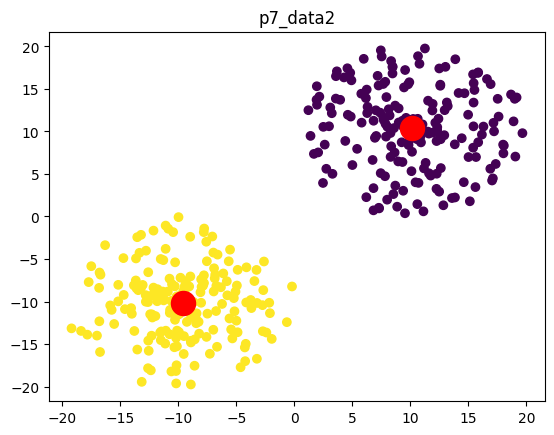

In [22]:
# Ahora lo mismo para p7_data2
kmeans = KMeans(n_clusters=2)
kmeans.fit(p7_data2)
labels_data2 = kmeans.labels_
centroids_data2 = kmeans.cluster_centers_

# Graficamos los resultados de p7_data2
plt.scatter(p7_data2['x'], p7_data2['y'], c=labels_data2, cmap='viridis')
plt.scatter(centroids_data2[:, 0], centroids_data2[:, 1], s=300, c='red')
plt.title('p7_data2')
plt.show()


#### 3. Considerar el dataset `p7-iris.txt` (para leer el archivo, observar que los datos estan separados por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.

- (a) Cargue el archivo p7-iris.txt.
- (b) Grafique en un diagrama de dispersi´on la longitud del p´etalo vs el ancho del p´etalo.

In [24]:
# Notemos que p7-iris.txt es un archivo de texto que estan separados por tabulaciones
p7_iris = pd.read_csv('../_src/Datasets/p7-iris.txt', sep='\t')
p7_iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


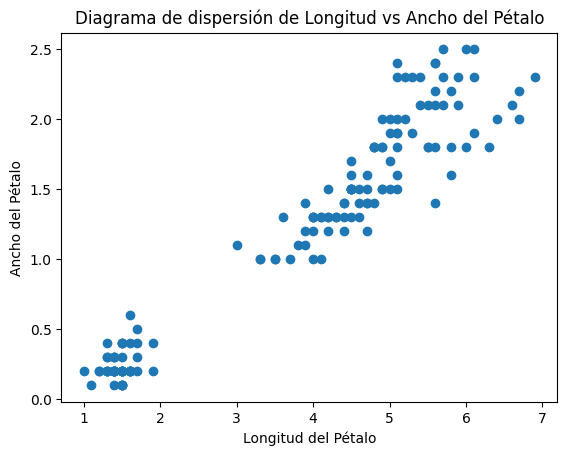

In [25]:
# Graficamos diagrama de dispersion de LongPetalo vs AnchoPetalo
plt.scatter(p7_iris['LongPetalo'], p7_iris['AnchoPetalo'])
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión de Longitud vs Ancho del Pétalo')
plt.show()

#### (c) Efectue un clustering k-medias con el comando `KMeans` de los datos basados en las cuatro columnas de datos, considere k = 3 clusters
#### (d) Repita el inciso b) coloreando en funcion del índice de cluster obtenido

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


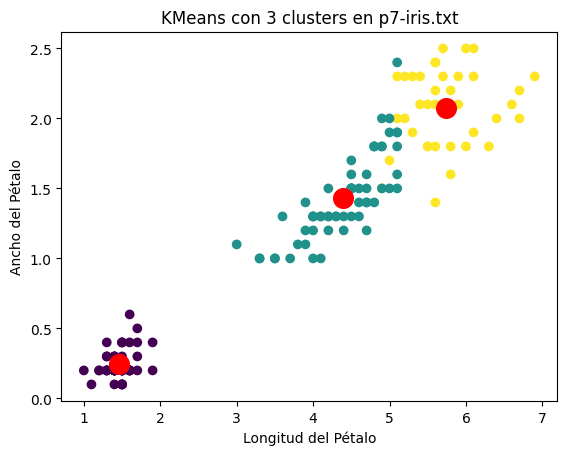

In [28]:
# Hacemos kmeans con 3 clusters de los datos basados en las cuatro columnas
kmeans = KMeans(n_clusters=3)
kmeans.fit(p7_iris)
labels_iris = kmeans.labels_
centroids_iris = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(p7_iris['LongPetalo'], p7_iris['AnchoPetalo'], c=labels_iris, cmap='viridis')
plt.scatter(centroids_iris[:, 2], centroids_iris[:, 3], s=200, c='red')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('KMeans con 3 clusters en p7-iris.txt')
plt.show()

#### (e) Evalue el error de clustering en funcion de la siguiente formula (within-cluster sum of squares, WCSS):

\begin{equation}
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
\end{equation}

#### donde $C_i$ representa el cluster i-ésimo y $\mu_i$ es el centroide de dicho cluster, definido como

\begin{equation}
\mu_i = \frac{1}{\#C_i} \sum_{x \in C_i} x.
\end{equation}


In [30]:
# Evaluamos el error de KMeans en p7-iris.txt con 3 clusters usando la función wcss
wcss = kmeans.inertia_
print(f"Error de KMeans en p7-iris.txt con 3 clusters: {wcss}")

Error de KMeans en p7-iris.txt con 3 clusters: 78.94084142614601


#### (f) Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el `WCSS` para cada valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre “complejidad” (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).

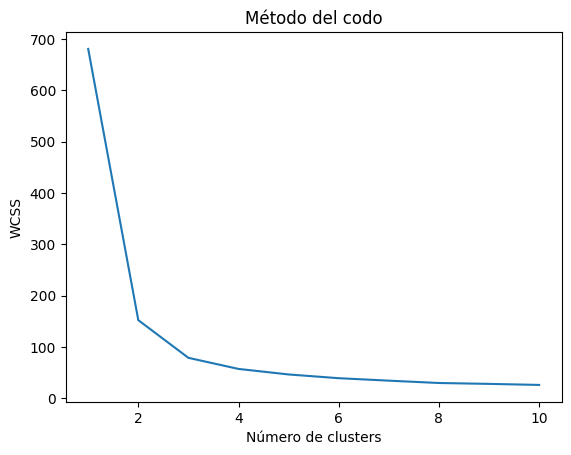

In [33]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(p7_iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


##### El "codo" parece estar alrededor de 3 clusters. Hasta 3 clusters, el WCSS baja mucho, pero después de 3 clusters, la reducción en WCSS ya no es tan notable.

### 4. Consideremos el dataset de datos artificiales p7-dataSinEscalar.csv

- (a) Cargar los datos y grafıcarlos.
- (b) A priori y mirando el grafico, determine la cantidad de clusters que puede detectar en los mismos e imagine inicialmente c´omo debieran ser esos clusters.

In [34]:
dataSinEscalar = pd.read_csv('../_src/Datasets/p7-dataSinEscalar.csv')
dataSinEscalar.head()

,x,y
0,0.002501,6488.26703
1,-0.026980,2521.94722
2,-0.029001,3068.77291
3,0.007030,4314.27482
4,-0.025356,2384.49945


In [36]:
dataSinEscalar.columns

Index(['x', ' y'], dtype='object')

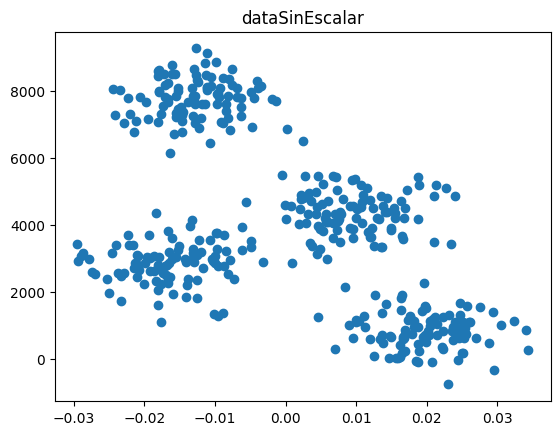

In [37]:
# Graficamos
plt.scatter(dataSinEscalar['x'], dataSinEscalar[' y'])
plt.title('dataSinEscalar')
plt.show()

Parece ser 4 clusters

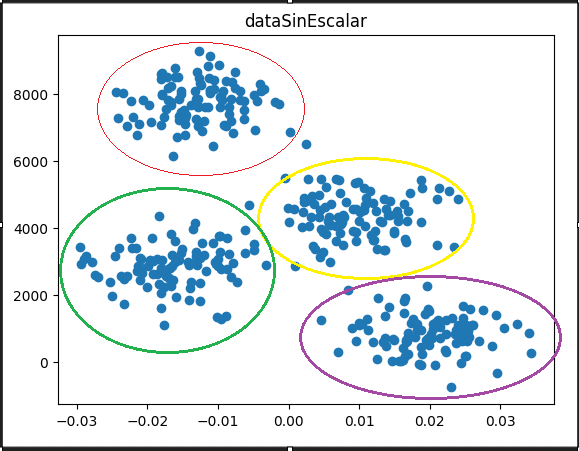

#### (c) Realizar un clustering k-medias con el valor de k antes determinado.
#### (d) ¿Considera satisfactorio el clustering obtenido? ¿Representa lo que usted esperaba?

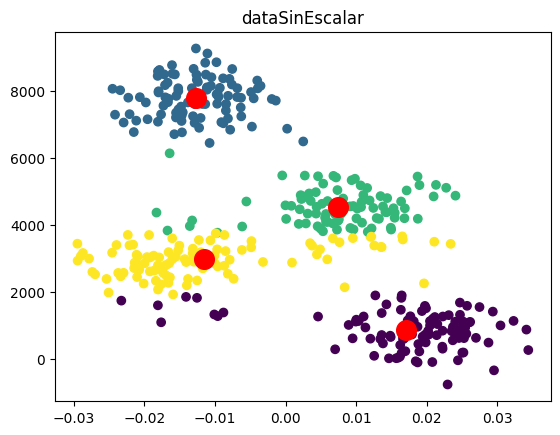

In [44]:
# Hacemos kmeans con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataSinEscalar)
labels_dataSinEscalar = kmeans.labels_
centroids_dataSinEscalar = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(dataSinEscalar['x'], dataSinEscalar[' y'], c=labels_dataSinEscalar, cmap='viridis')
plt.scatter(centroids_dataSinEscalar[:, 0], centroids_dataSinEscalar[:, 1], s=200, c='red')
plt.title('dataSinEscalar')
plt.show()

No parece muy bien hecho. El amarillo siguio de largo. 

#### (e) Uno de los problemas que tenemos es que el metodo de k-medias es muy sensible a las diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las variables de forma tal que todas se muevan en el mismo rango. 

#### Por ejemplo, podemos conseguir eso efectuando una normalizacion como sigue: 
$$
X_{ij} = \frac{X_{ij} - \min(X_{.j})}{\max(X_{.j}) - \min(X_{.j})}
$$

#### De esta manera, logramos que los datos de cada columna caigan entre 0 y 1. Normalice los datos siguiendo este criterio

In [47]:
# Reescalamos las variables usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataEscalar = scaler.fit_transform(dataSinEscalar)

dataEscalar

array([[5.00874339e-01, 7.23260642e-01],
       [3.92513227e-02, 3.27807082e-01],
       [7.60695866e-03, 3.82327185e-01],
       [5.71789890e-01, 5.06507329e-01],
       [6.46732726e-02, 3.14103141e-01],
       [1.95055509e-01, 8.54583563e-01],
       [8.09842904e-01, 1.59989785e-01],
       [4.62959727e-01, 4.92735203e-01],
       [1.81363732e-01, 3.78130931e-01],
       [7.38479184e-01, 2.02972222e-01],
       [3.13051385e-01, 8.56012815e-01],
       [8.56191846e-01, 9.50395166e-02],
       [8.27834706e-01, 4.18459016e-01],
       [8.67221413e-02, 4.15158163e-01],
       [3.37704675e-01, 3.71162756e-01],
       [9.67304466e-01, 1.89197371e-01],
       [1.78575752e-01, 2.35588912e-01],
       [7.15935656e-01, 1.17226660e-01],
       [6.52388453e-01, 4.64495167e-01],
       [2.69478947e-01, 4.29974464e-01],
       [2.95100994e-01, 4.28865769e-01],
       [1.37246576e-01, 3.41899534e-01],
       [1.55618606e-01, 7.89371159e-01],
       [6.30247078e-01, 5.43450378e-01],
       [5.894085

#### (f) Vuelva a correr el procedimiento de clustering, tome las etiquetas de clustering obtenidos y grafique los datos originales con un color que dependa del clustering obtenido con los datos escalados.

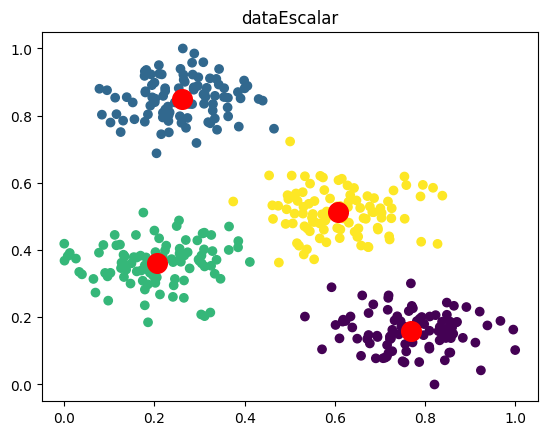

In [48]:
# Convertimos a DataFrame
dataEscalar = pd.DataFrame(dataEscalar, columns=['x', 'y'])

# Volvemos a hacer kmeans con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataEscalar)
labels_dataEscalar = kmeans.labels_
centroids_dataEscalar = kmeans.cluster_centers_

# Graficamos los resultados
plt.scatter(dataEscalar['x'], dataEscalar['y'], c=labels_dataEscalar, cmap='viridis')
plt.scatter(centroids_dataEscalar[:, 0], centroids_dataEscalar[:, 1], s=200, c='red')
plt.title('dataEscalar')
plt.show()

### 5. (opcional) Implementar el algoritmo DBSCAN para analizar los sets de datos anteriores. Comparar los resultados con los obtenidos usando k-medias

In [1]:
# Se deja como ejercicio al lector

## Clasificación

### 6. Implementar un clasificador de k-NN que prediga el sexo de los pinguinos utilizando como variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares) y evaluar el error de prediccion en cada caso. ¿Como elegirıa el valor de k optimo?

In [64]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


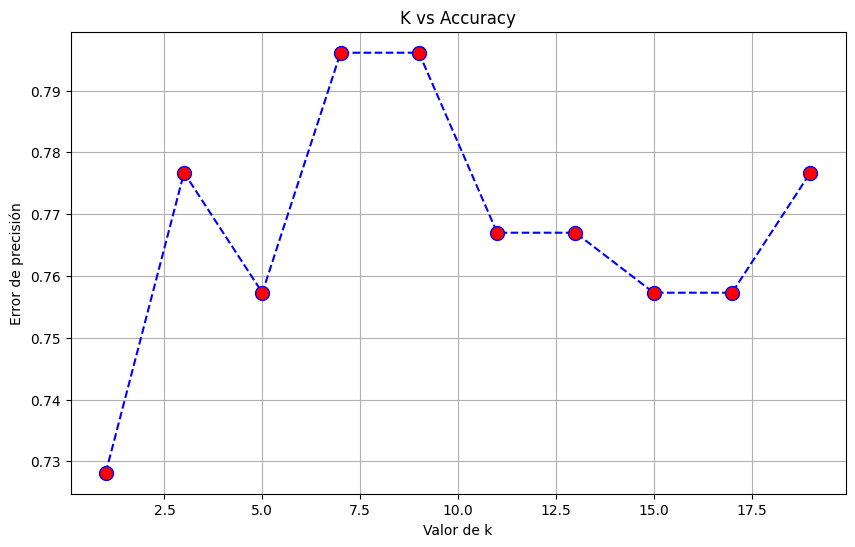

In [65]:
# Convertimos la variable sex a numérica
penguins["sex"] = penguins["sex"].apply(lambda x: 1 if x =="Male" else 0)
# Primero eliminamos nulos
penguins = penguins.dropna()

# Seleccionamos el largo del pico y el largo de la aleta y la variable a predecir
X = penguins[['bill_length_mm', 'flipper_length_mm']]
y = penguins['sex']

# Estandarizamos los datos
X = MinMaxScaler().set_output(transform="pandas").fit_transform(X)

# Dividimos los datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Hacemos k-NN y evaluamos el error en predicción
valores_k = range(1, 20,2)
accuracies = []

for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
# Graficamos el error de precisión
plt.figure(figsize=(10, 6))
plt.plot(valores_k, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("K vs Accuracy")
plt.xlabel('Valor de k')
plt.ylabel('Error de precisión')
plt.grid(True)    
plt.show()

In [66]:
optimal_k = valores_k[accuracies.index(max(accuracies))]
print(f'El valor óptimo de k es: {optimal_k}')

El valor óptimo de k es: 7



Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.78      0.79      0.78        48

    accuracy                           0.80       103
   macro avg       0.80      0.80      0.80       103
weighted avg       0.80      0.80      0.80       103



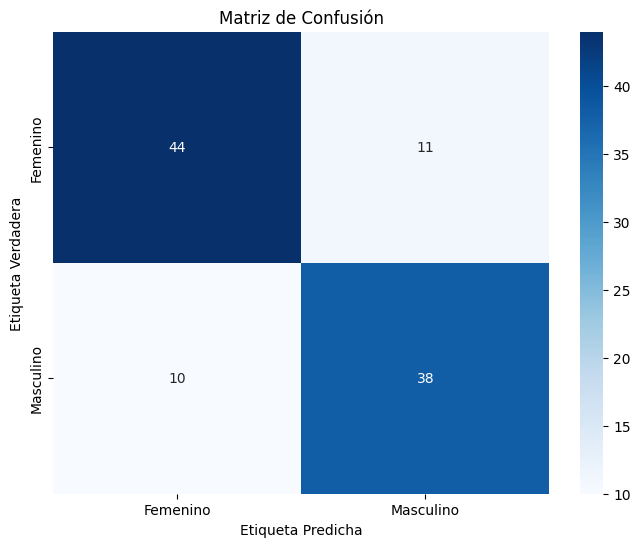

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecir en el conjunto de prueba con el k óptimo
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

print('\nInforme de clasificación:')
print(classification_report(y_test, y_pred_optimal))

# Graficar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Femenino', 'Masculino'], yticklabels=['Femenino', 'Masculino'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

### 7. Implementar un clasificador de k-NN que prediga la especie de los pinguinos. Pueden elegir las variables. ¿Con cuales variables obtienen mejores resultados? Reportar los resultados con visualizaciones adecuadas

In [83]:
# Cargar el dataset
penguins = sns.load_dataset('penguins')
# Eliminar filas con valores nulos
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species'], inplace=True)
# Convertir la variable 'species' a valores numéricos
species_mapping = {species: idx for idx, species in enumerate(penguins['species'].unique())}
penguins['species'] = penguins['species'].map(species_mapping)

In [84]:
# Veamos con cual de todas las combinaciones entre las variables puedo acertar (solo numericas)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Generar todas las combinaciones de características
combinations = []
for r in range(1, len(features) + 1):
    combinations.extend(itertools.combinations(features, r))
    
# Almacenar la mejor combinación y su precisión
best_accuracy = 0
best_combination = None
best_k = 0

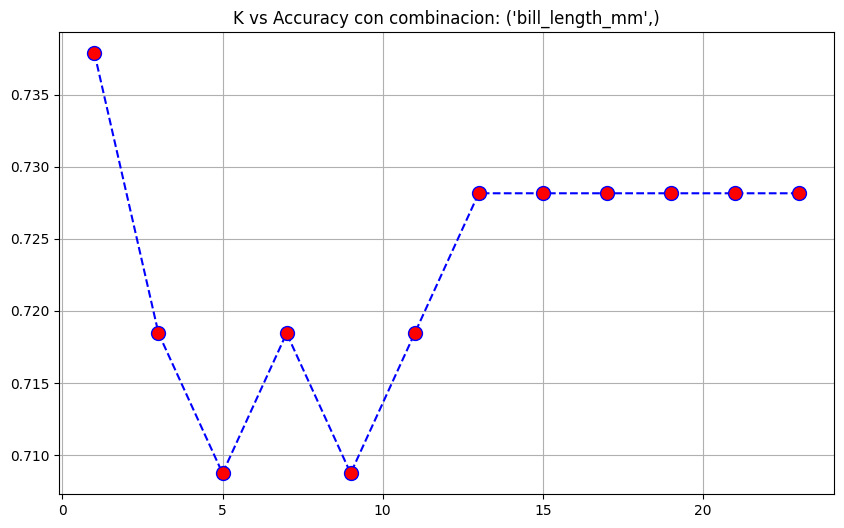

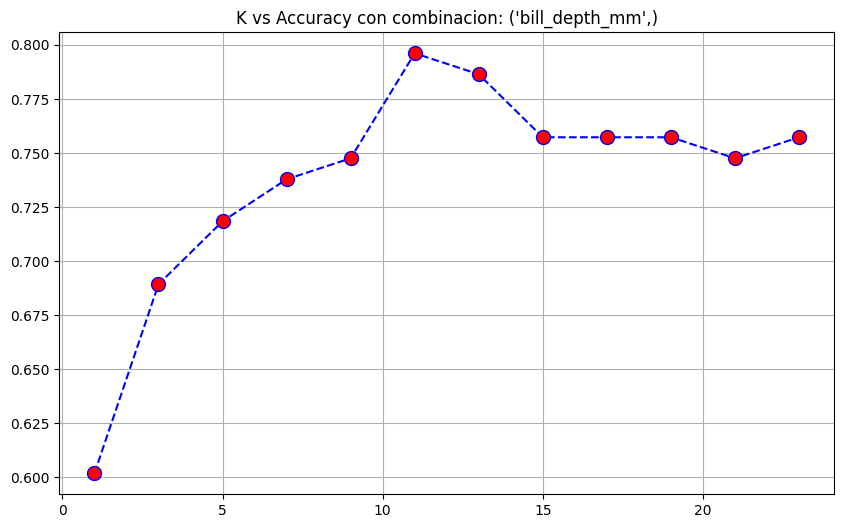

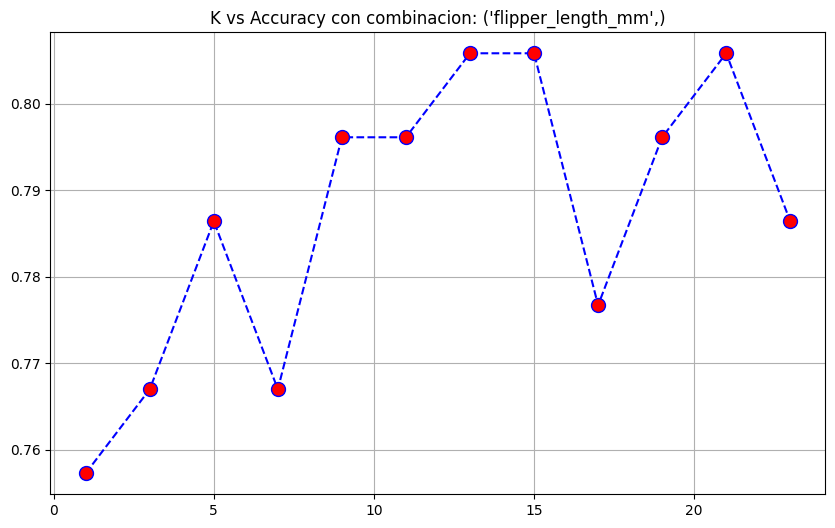

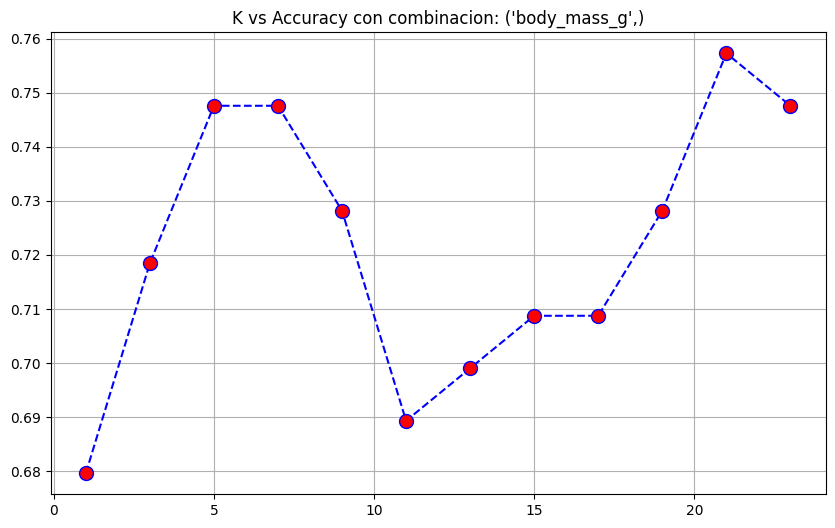

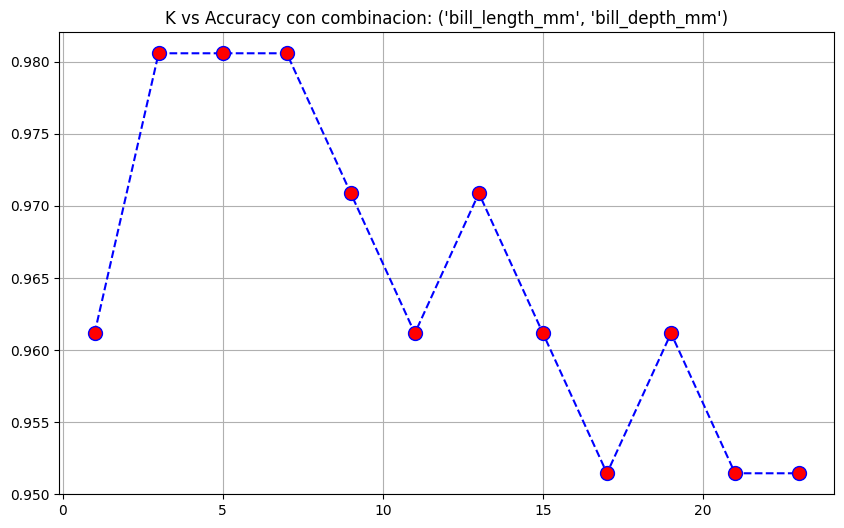

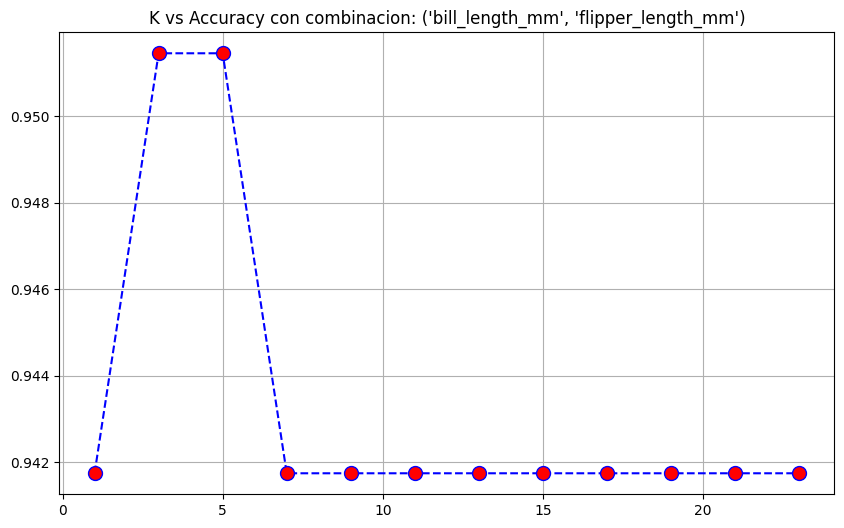

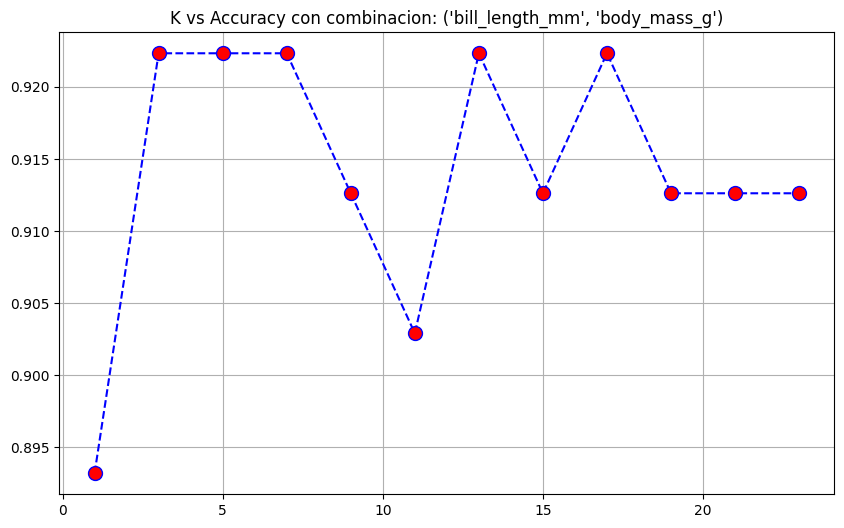

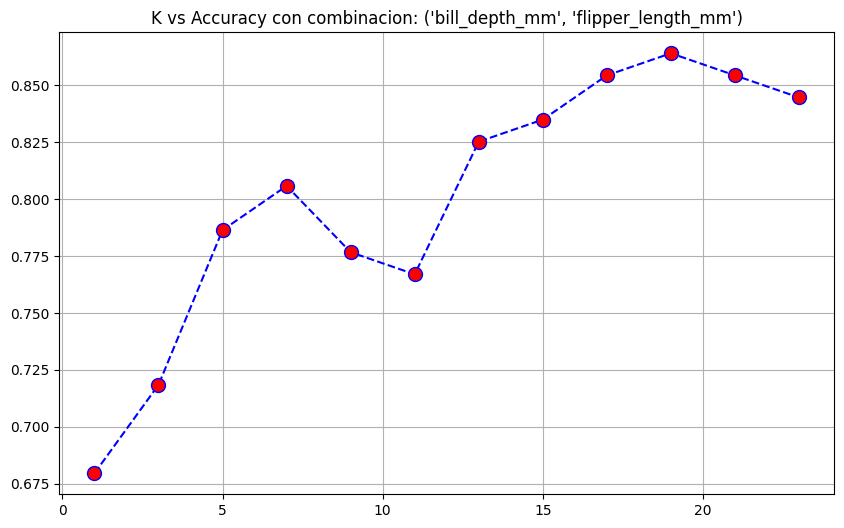

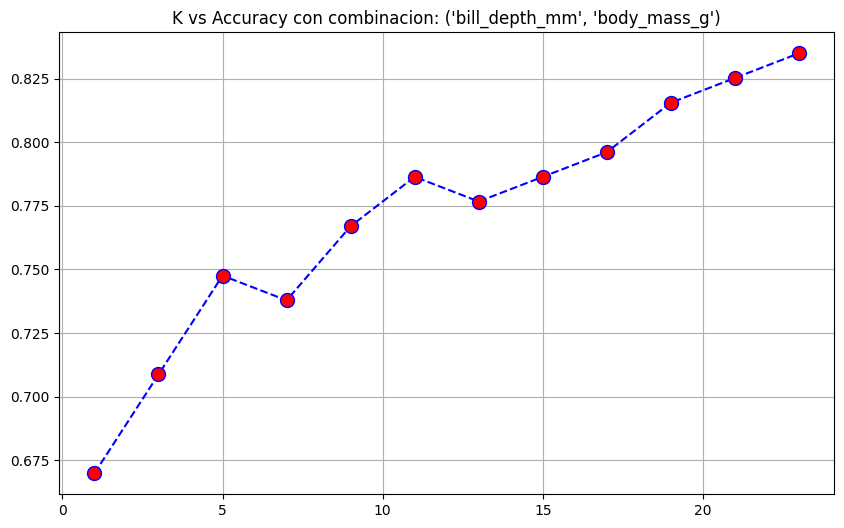

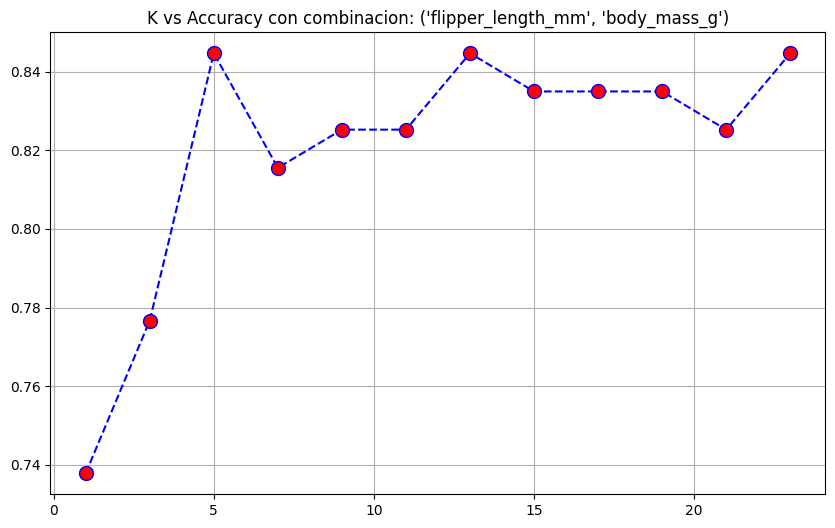

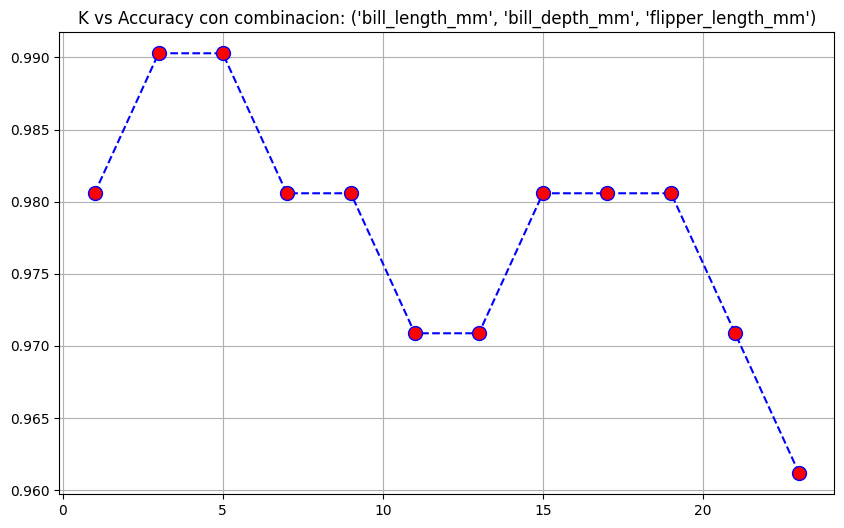

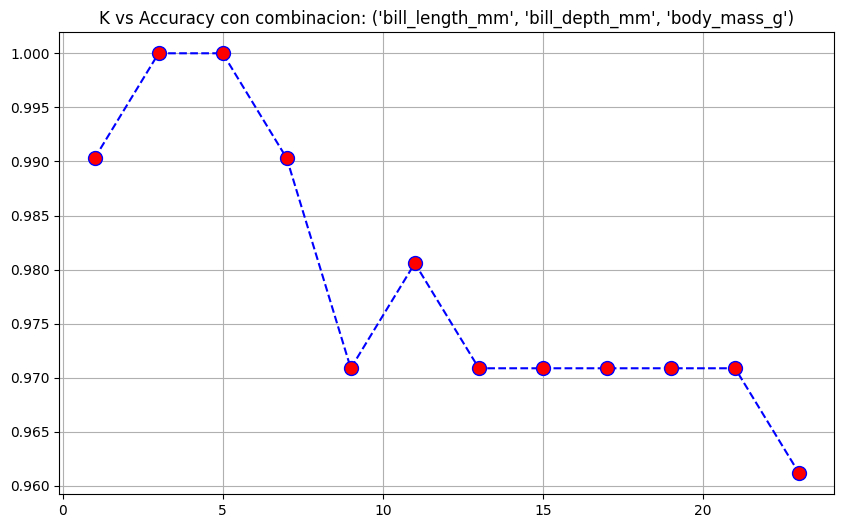

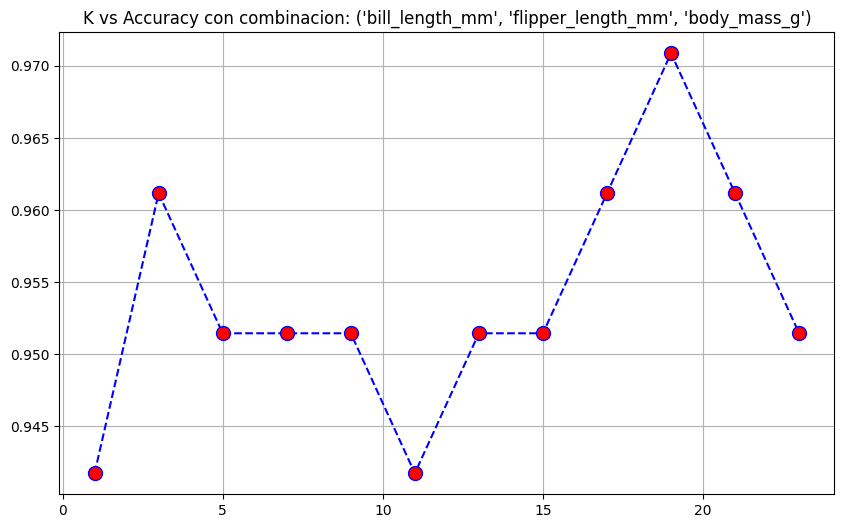

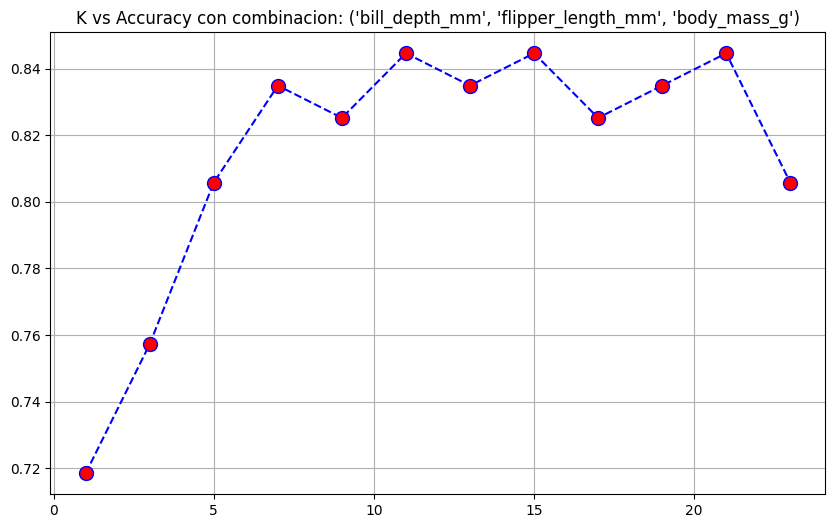

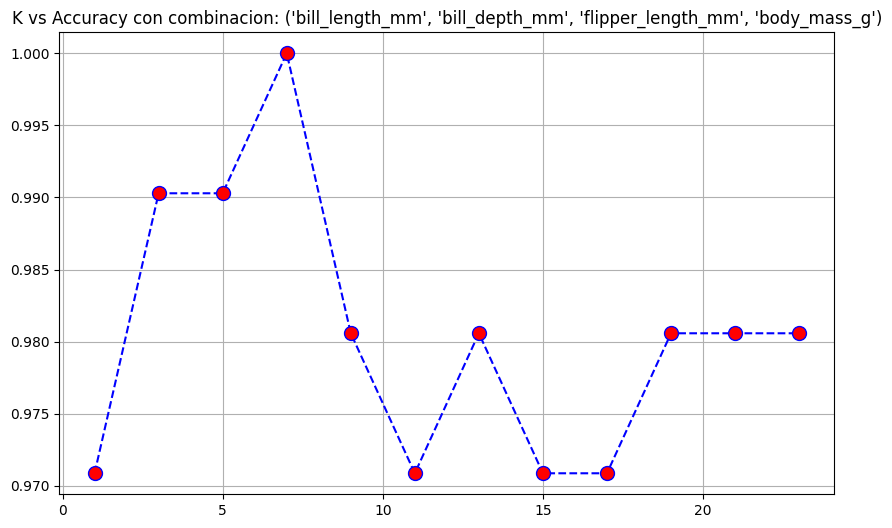

In [85]:
# Evaluar cada combinación de características
for combo in combinations:
    X = penguins[list(combo)]
    y = penguins['species']
    
    X = MinMaxScaler().set_output(transform="pandas").fit_transform(X)
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Encontrar el valor óptimo de k
    k_values = range(1, 25, 2)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    optimal_k = k_values[accuracies.index(max(accuracies))]
    best_accuracy_for_combo = max(accuracies)
    
    if best_accuracy_for_combo > best_accuracy:
        best_accuracy = best_accuracy_for_combo
        best_combination = combo
        best_k = optimal_k
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title(f"K vs Accuracy con combinacion: {combo}")
    plt.grid(True)    
    plt.show()


La mejor combinación de características es: ('bill_length_mm', 'bill_depth_mm', 'body_mass_g')
El valor óptimo de k es: 3
La mejor precisión es: 1.0
Matriz de confusión:
[[50  0  0]
 [ 0 18  0]
 [ 0  0 35]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



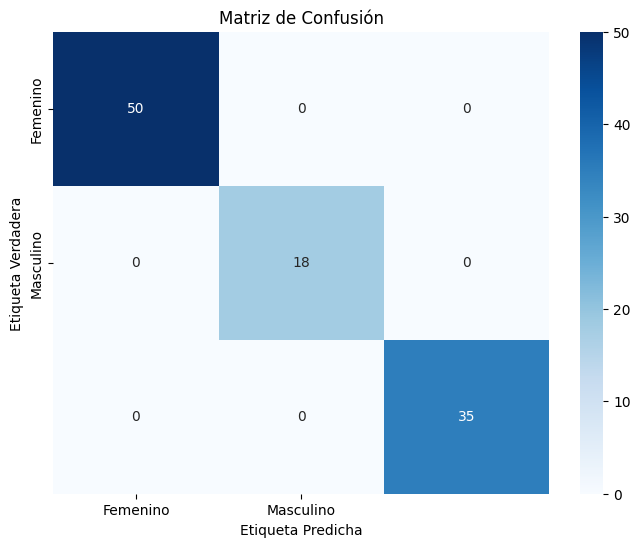

In [86]:
print(f'La mejor combinación de características es: {best_combination}')
print(f'El valor óptimo de k es: {best_k}')
print(f'La mejor precisión es: {best_accuracy}')

# Entrenar el clasificador k-NN con la mejor combinación y el valor óptimo de k
X_best = penguins[list(best_combination)]
y_best = penguins['species']

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.3, random_state=42)
X_train_best = scaler.fit_transform(X_train_best)
X_test_best = scaler.transform(X_test_best)

knn_optimal_best = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal_best.fit(X_train_best, y_train_best)
y_pred_optimal_best = knn_optimal_best.predict(X_test_best)

# Calcular la matriz de confusión
conf_matrix_best = confusion_matrix(y_test_best, y_pred_optimal_best)

# Imprimir la matriz de confusión y el informe de clasificación
print('Matriz de confusión:')
print(conf_matrix_best)

print('\nInforme de clasificación:')
print(classification_report(y_test_best, y_pred_optimal_best))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Femenino', 'Masculino'], yticklabels=['Femenino', 'Masculino'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Sacado de chatgpt

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


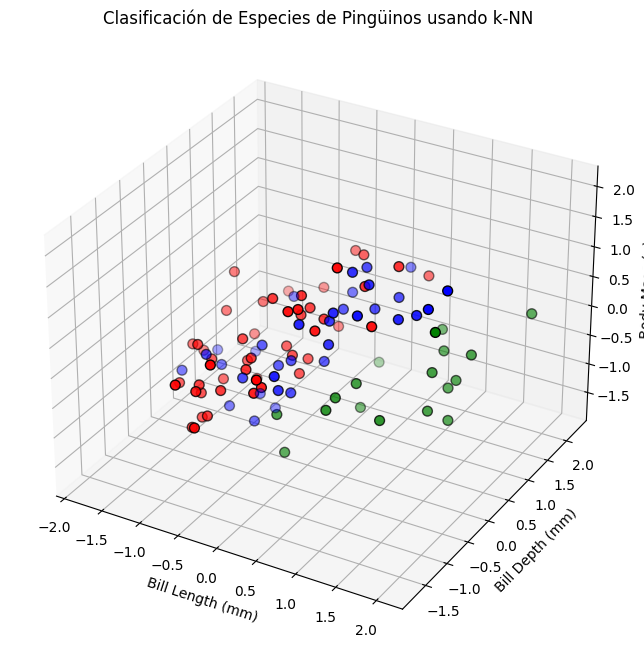

In [87]:
# Crear una malla para los datos en 3D
x_min, x_max = X_test_best[:, 0].min() - 1, X_test_best[:, 0].max() + 1
y_min, y_max = X_test_best[:, 1].min() - 1, X_test_best[:, 1].max() + 1
z_min, z_max = X_test_best[:, 2].min() - 100, X_test_best[:, 2].max() + 100
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

# Predecir para cada punto en la malla
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
grid_points = scaler.transform(grid_points)
Z = knn_optimal_best.predict(grid_points)
Z = Z.reshape(xx.shape)

# Crear una figura 3D
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para las diferentes especies
colors = ['r', 'g', 'b']
species = ['Adelie', 'Chinstrap', 'Gentoo']

# Graficar los puntos de prueba
for species_id, color in enumerate(colors):
    idx = np.where(y_test_best == species_id)
    ax.scatter(X_test_best[idx, 0], X_test_best[idx, 1], X_test_best[idx, 2], c=color, label=species[species_id], edgecolor='k', s=50)

# Agregar la leyenda
# ax.legend()

# Etiquetas de los ejes
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Body Mass (g)')
ax.set_title('Clasificación de Especies de Pingüinos usando k-NN')

plt.show()

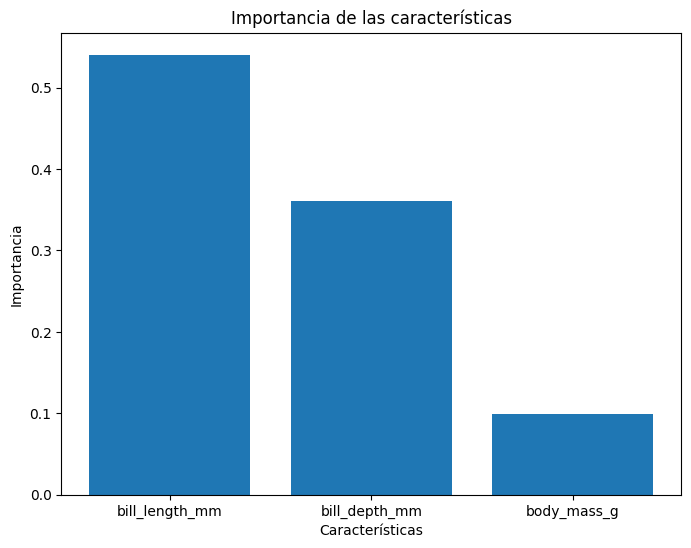

In [89]:
# Para obtener una idea de la importancia de las características
from sklearn.tree import DecisionTreeClassifier
importances = DecisionTreeClassifier().fit(X_best, y_best).feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(len(best_combination)), importances, align='center')
plt.xticks(range(len(best_combination)), best_combination)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()
